# Gathering data from the web - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** June 2022  
**Python version:** Python 3.6+     
**License:** MIT License  
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primariy reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`4_web_scraping.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/4_web_scraping.ipynb)  

## Import required packages  

In [2]:
import requests
from requests_html import HTMLSession

In [3]:
import pandas as pd
import numpy as np

### Also run the code below, it solves a couple of minor problems that you don't need to worry about

In [4]:
from IPython.display import HTML
import time
def show_image(url):
    return HTML('<img src="{}?{}"></img>'.format(url, int(time.time())))

In [5]:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px; margin-bottom:50px; margin-top:50px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Warning: if you are using Python 3.8 or 3.9 you might experience a bug with requests-html where the ".find()" function will return too much text even if the CSS selector is correct.  You can check whether this is the case using the code below, if it shows an error, please follow the alternative instructions using requests + LXML.</span>

In [6]:
def check_requests_issue():
    page = 'https://foster.uw.edu/faculty-research/directory/david-burgstahler/'
    name_selector = '#foster-content h2.entry-title'
    correct_string = 'David Burgstahler'

    session = HTMLSession()
    res = session.get(page)
    name_element = res.html.find(name_selector, first=True)
    if name_element.text == correct_string:
        print('Your system does not have the bug, you are good to use requests-html!')
    else:
        assert name_element.text == correct_string, "Error, your system has the bug. :("

In [7]:
check_requests_issue()

Your system does not have the bug, you are good to use requests-html!


**If the above resulted in an error that you system has the bug, please remove `lxml` and and `requests-html` and reinstall it:**

```bash
pip uninstall lxml
pip uninstall requests-html

pip install lxml
pip install request-html
```

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1 </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

The goal of these problems is to get hands-on experience with gathering data from the Web using `Requests` and `Requests-HTML`.

The tasks below are split up into two sections:  

1. API tasks  

2. Web scraping tasks  

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>API Problem</span>
</div>

## 1) Use the `genderize.io` API with the `requests` library

Use this API: https://genderize.io/

**NOTE:** it might be that this API is down if you get a "too many requests message"

### 1a) Use the API to automatically guess the gender of your first name

### 1b) Write a function that take any first name as input and that uses the API to return the predicted gender and probability

### 1c) Create a list of names, and use the `guess_gender` function to predict the gender of each name. Include a 1 second pause after each guess.  
**Hint:** *use the `time` library for the pause*

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Web Scraping Problem</span>
</div>

## 2) Create a webscraper that can collect information for a Foster Faculty member

Your goal is to create a webscraper that can extract the following information from a Foster Faculty staff page (such as this one: https://foster.uw.edu/faculty-research/directory/david-burgstahler/ ):

* Name  
* URL to profile image  
* Title of first selected publication

**Hint 1:** use the `requests-html` library (or `requests` + `lxml` if you experience the bug)  
**Hint 2:** if you get an error mentioning SSL --> add `, verify=False` to the `session.get()` command like so: `session.get(.... , verify=False)`

### 2a) Use `requests-html` to extract the above three pieces of information from the Faculty page of David Burgstahler  
url = https://foster.uw.edu/faculty-research/directory/david-burgstahler/

---

**Tip** you can show a picture from a URL in the notebook by using the provided `show_image(url)` function

### 2b) Create a function that takes a URL for a Staff page and extracts the three pieces of information and returns it as a dictionary  
Make sure to test your function by feeding it with the URL for various staff members! A full list is available here:  
https://foster.uw.edu/faculty-research/academic-departments/accounting/faculty/   

**Warning:** make sure that the function can deal with faculty members that do not have a picture or any selected publication, test if with (for example):   
https://foster.uw.edu/faculty-research/directory/jane-jollineau/

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2: Advanced Funcionality</span>
</div>

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>API Problem</span>
</div>

## 3) Get current picture of camera using the `NPS` (National Park Service) API and `requests`

### 3a) Get access key

Go to " https://www.nps.gov/subjects/developer/get-started.htm " in your browser.  
Fill out the form using your credentials (or random credentials like test@test.com) and copy the access key and assign it to a Python variable.

### 3b) Test the API and retrieve the alerts for MT Rainier National Park

The API requires that you pass the API key as a header, which you can do using:

```python

headers = {
    'X-Api-Key' : '<YOUR KEY>'
}

url = 'https://developer.nps.gov/api/v1/alerts'

res = requests.get(url, params = <your_params>, headers = headers)

```

For details on the alerts endpoint check:
    
https://www.nps.gov/subjects/developer/api-documentation.htm#/alerts

The park code for Mt Rainier is `mora`.

### 3c) Retrieve the URL to the webcam of Hurricane Ridge in the Olympic National Park

The endpoint is documented here: https://www.nps.gov/subjects/developer/api-documentation.htm#/webcams/getWebcams

The details are:
- Park code: `olym`
- Webcam id: `577E4D96-8E42-4F3A-B074-944CD63BADB3`

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Web Scraping Problem</span>
</div>

## 4) Create a webscraper that creates an Excel sheet with information for all Foster (UW) Faculty members in Accounting

### 4a) Create a list of URLs for all the Foster faculty members in Accounting  
This information is here: https://foster.uw.edu/faculty-research/academic-departments/accounting/faculty/

**Hint 1:** use the `requests-html` library (or `requests` + `lxml` if you experience the bug)  
**Hint 2:** if you get an error mentioning SSL --> add `, verify=False` to the `session.get()` command like so: `session.get(.... , verify=False)`

### 4b) Apply the function you created in step 2b to all the URLs you gathered in step 4a and save it all (including the URL) to a Pandas DataFrame

Optional, you track the progress using the `tqdm` library:

```python
from tqdm.notebook import tqdm

for i in tqdm(range(100)):
    time.sleep(0.5)
```

## 5) Create a function that retrieves all the sport events in Seattle for a given date range

https://visitseattle.org/ maintains an event calendar for events in Seattle.  

You can find the sports events at this page:  
https://visitseattle.org/?s&frm=events&event_type%5B0%5D=sports

**Task:** create a function that takes a starting date and an end date and returns the following information about the sports events:

* Title  
* Link  
* Location  
* Date info  

**Optional challenge:** extend your function so that it can handle pagination (i.e., more than just one page). 

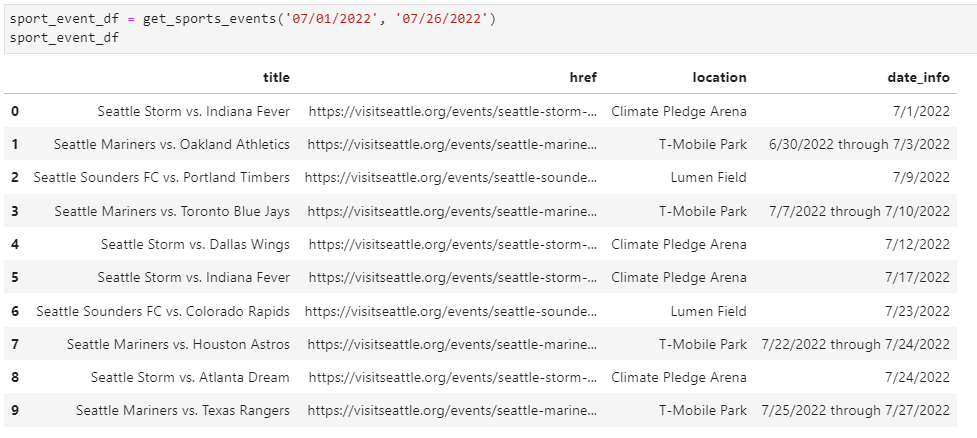